# Data Mining Versuch Mobile User Analysis and Gender-Age-Group Prediction
* Autor: Prof. Dr. Johannes Maucher
* Datum: 04.10.2016

[Übersicht Ipython Notebooks im Data Mining Praktikum](Data Mining Praktikum.ipynb)

# Einführung

## Kurzbeschreibung:

In diesem Versuch werden die im Rahmen eines Kaggle-Contest [von _TalkingData_ bereitgestellten Daten](https://www.kaggle.com/c/talkingdata-mobile-user-demographics/data) analysiert. Die Daten enthalten für eine große Menge chinesischer User, Angaben zur Marke und Modell des Smartphones und zu den installierten und aktiven Apps. Ziel ist es aus den zur Verfügung stehenden Trainingsdaten ein Modell zu erlernen, das die Klassifikation der User in die jeweilige Gender-Age-Gruppe erlaubt. Für die Lösung dieser Aufgabe müssen sämtliche Schritte der Data Mining Prozesskette implementiert werden:

1. Datenbeschaffung und Zugriff
2. Datenauswahl: Welche der vorhandenen Daten sind für die gegebene Aufgabe tatsächlich relevant
3. Datenbereinigung: Wie wird mit fehlenden und fehlerhaften Daten umgegangen?
4. Datentransformation: Wie können aus den vorhandenen Daten informative Mermale gewonnen werden?
5. Modellbildung: Unüberwachtes oder überwachtes erlernen eines Modells; Clustering-, Klassifikations- oder Regressionsmodell.
6. Evaluation, Visualisierung und Interpretation der Daten/Ergebnisse

## Lernziele:
In diesem Versuch sollen Kenntnisse in folgenden Themen vermittelt werden:

* Zugriff auf Daten in .csv Files
* Zugriff auf Daten in SQLite Files
* Statistische Analyse und Visualisierung von Daten
* Implementierung der oben genannten Data Mining Prozessschritte, insbesondere:

    * Feature-Engineering: Berechnung von für die gegebene Aufgabe relevanter Daten aus Rohdaten
    * Clustering (unüberwachtes Lernen) 
    * Klassifikation/Prädiktion (überwachtes Lernen) mit verschiedenen Machine Learning Verfahren
    * Evaluation von Klassifikationsverfahren

## Aufgaben zur Vorbereitung

1. Laden Sie die Daten entweder vom Skripteserver oder direkt von [Kaggle](https://www.kaggle.com/c/talkingdata-mobile-user-demographics/data) herunter und versuchen Sie die Daten anhand dieser [Beschreibung](https://www.kaggle.com/c/talkingdata-mobile-user-demographics/data) zu verstehen.
2. In diesem Versuch soll die Gender-Age-Group von Smartphone-Usern vorhergesagt werden. Überlegen Sie sich welche der vorhandenen Daten für diese Vorhersage relevant sein könnten.
3. Für die Vorhersage kann ein beliebiger Klassifikationsalgorithmus aus dem Bereich des überwachten Lernens eingesetzt werden. Das Prinzip des überwachten Lernens und das entsprechende Testen des gelernten Modells ist in der unten aufgeführten Abbildung dargestellt. Machen Sie sich mit diesem Prinzip vertraut.

4. Für das überwachte Lernen sind gelabelte Daten (Soll-Ausgabe) notwendig. In diesem Versuch ist die Ausgabe die Gender-Age-Group der User. Im File *gender\_age\_train.csv* ist für 74645 User (devices) die zugehörigen Gender-Age-Group angegeben. Die Menge aller gelabelten Daten muss für die Modellvalidierung in disjunkte Trainings- und Testpartitionen unterteilt werden. In diesem Versuch kommt sowohl eine einfache Partitionierung in Trainings- und Testdaten als auch eine Kreuzvalidierung zum Einsatz ([KI-Vorlesung](https://www.mi.hdm-stuttgart.de/mib/studium/intern/skripteserver/skripte/Einfuehrung_Kuenstliche_Intelligenz/WS1516/06_PartLernen1.pdf)). Machen Sie sich mit dem Prinzip der Kreuzvalidierung (Abbildung unten) vertraut.

5. Den meisten Machine Learning-Algorithmen können kategoriale Parameter nicht direkt übergeben werden. Diese Parameter werden typisch *One-Hot* encodiert. Machen Sie sich mit diesem Prinzip vertraut.

6. In diesem Versuch soll ein Multilayer-Perzeptron (MLP) als Klassifikator eingesetzt werden. Machen Sie sich mit dem MLP vertraut. [KI-Vorlesung](https://www.mi.hdm-stuttgart.de/mib/studium/intern/skripteserver/skripte/Einfuehrung_Kuenstliche_Intelligenz/WS1516/09_PartLernen4.pdf), [MLP in Scikit-Learn](http://scikit-learn.org/stable/modules/neural_networks_supervised.html).

**Prinzip überwachtes Lernen und Validierung:**
![Prinzip überwachtes Lernen](https://www.hdm-stuttgart.de/~maucher/ipnotebooks/DataMining//Bilder/SupervisedLarningSchemaValidation.png "Überwachtes Lernen Schema")





**Prinzip der 10-fachen Kreuzvalidierung:**

![Kreuzvalidierung](https://www.hdm-stuttgart.de/~maucher/ipnotebooks/DataMining//Bilder/CrossValidation.jpg "Cross-Validation")

# Durchführung
## Datenzugriff
Die Daten sind in insgesamt 7 .csv Files organisiert (das File sample_submission.csv wird nicht benötigt). Die einzelnen .csv Dateien sind z.T. sehr groß. In diesem Fall bietet es sich an, nicht das ganze File in einen Pandas-Dataframe zu laden, sondern das .csv-File zunächst in eine Datenbank zu schreiben und dann auf diese dediziert zuzugreifen. 

_Tipp:_ Mit der auf dem Skripteserver bereitgestellten Datei _brandMap.txt_, können die chinesischen Schriftzeichen in den Markennamen übersetzt werden.

**Aufgaben:**

1. Lesen Sie jedes der .csv Files in chunks von jeweils ca. 20000 Zeilen in einen Pandas Dataframe ein und schreiben Sie die Daten chunk für chunk in eine SQLite Database. Für das Einlesen ist die Pandas-Methode [read_csv()](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) mit dem Parameter _chunksize_ zu verwenden. Für das schreiben der Daten aus dem Pandas Dataframe in die SQLite Datenbank ist die Pandas-Methode [to_sql()](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_sql.html) zu verwenden. Für jedes .csv File soll in der SQLite-DB eine eigene Tabelle angelegt werden. Als DB-connector soll eine engine-Instanz des _SQLAlchemy_-Pakets mit der Methode create\_engine() angelegt werden. Siehe z.B. [SQLAlchemy Doku](http://docs.sqlalchemy.org/en/latest/core/engines.html).

2. Nachdem alle Tabellen der DB angelegt sind, sollen aus jeder Tabelle die ersten 10 Zeilen mit der Pandas Methode [read_sql_query()](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_sql_query.html) abgefragt und angezeigt werden. Ausserdem ist für jede Tabelle die Größe (Anzahl der Zeilen) auszugeben.
3. Wie viele verschiedene devices befinden sich in der Tabelle, welche die Daten aus gender\_age\_train.csv enthält?
4. Wie viele verschiedene devices befinden sich in der Tabelle, welche die Daten aus events.csv enthält?
5. Wie viele verschiedene devices kommen in beiden dieser Tabellen vor? 


In [7]:
#1

import pandas as pd
import sqlite3 as sq
import glob

from sqlalchemy import create_engine
engine = create_engine('sqlite:///MobileUser.db')

#Connect sqlite
conn = engine.connect()

def readinchunks(tablename,conn,filename,chunksize):
    for chunk in pd.read_csv(filename, chunksize=20000, iterator=True, encoding='utf-8'):
        chunk.to_sql(name=tablename, con=conn, if_exists='append')
    print 'stored', tablename
        
#Read all CSVs
chunksize = 20000
path = "Ressource/Data/GenderAgePrediction/*.csv"
for filename in glob.glob(path):
    
    rawdata = pd.DataFrame()
    pd.read_csv(filename)
    
    tablename = filename.replace('.csv','').split('/')[-1]
    
    readinchunks(tablename,conn,filename,chunksize)

stored gender_age_test
stored phone_brand_device_model
stored app_events
stored events
stored label_categories
stored gender_age_train
stored sample_submission
stored app_labels


In [8]:
#2

tablelist = list(conn.execute("SELECT name FROM sqlite_master WHERE type='table' ORDER BY name;"))
for row in tablelist:
    print 'table:', row['name']
    print 'count:', conn.execute("SELECT MAX(_ROWID_) FROM "  + row['name']).fetchone()[0]
    print pd.read_sql_query("select * from " + row['name'] + " limit 10", conn)
    print '\n'

#for filename in glob.glob(path):
#    tablename = filename.replace('.csv','').split('/')[-1]

#    print pd.read_sql_query("select * from app_labels limit 10", conn)

table: app_events
count: 32473067
   index  event_id               app_id  is_installed  is_active
0      0         2  5927333115845830913             1          1
1      1         2 -5720078949152207372             1          0
2      2         2 -1633887856876571208             1          0
3      3         2  -653184325010919369             1          1
4      4         2  8693964245073640147             1          1
5      5         2  4775896950989639373             1          1
6      6         2 -8022267440849930066             1          0
7      7         2  9112463267739110219             1          0
8      8         2 -3725672010020973973             1          0
9      9         2  7167114343576723123             1          1


table: app_labels
count: 459943
   index               app_id  label_id
0      0  7324884708820027918       251
1      1 -4494216993218550286       251
2      2  6058196446775239644       406
3      3  6058196446775239644       407
4      4  8694625

In [9]:
#3

device_ids = conn.execute("SELECT DISTINCT count(device_id) FROM gender_age_train ORDER BY device_id;").fetchone()[0]
print device_ids

#for id in device_ids:
#    print id[0]

#4

device_ids = conn.execute("SELECT count(DISTINCT device_id) FROM gender_age_train").fetchone()[0]
print device_ids

74645
74645


In [10]:
#4
event_device_ids = conn.execute("SELECT count(DISTINCT device_id) FROM events").fetchone()[0]
print event_device_ids


60865


In [11]:
#5
common_ids = conn.execute("SELECT count(DISTINCT events.device_id) FROM events INNER JOIN gender_age_train ON events.device_id = gender_age_train.device_id;").fetchone()[0]
print common_ids

23309


## Deskriptive Statistik

In der obigen Teilaufgabe sollte die Schnittstelle zwischen Pandas Dataframes und Datenbanken (hier SQLite) demonstriert werden. Diese Art von Datenhandling eignet sich besonders im Fall sehr großer Datenmengen, die nicht im Arbeitsspeicher gehalten werden können. Die Dateien in diesem Versuch sind tatsächlich nicht so groß, dass sie nicht als ganzes in Pandas-Dataframes geladen werden könnten. In allen folgenden Teilversuchen ist Ihnen freigestellt, ob Sie mit der Datenbank-Variante oder der in-memory Variante (alle Daten im Pandas-Dataframe) arbeiten.

### Verteilung der User über die Gender-Age-Gruppen

Die Menge aller User wird in 12 verschiedene Gender-Age-Groups unterteilt. Bestimmen Sie die Verteilung der User in der gender\_age\_train-Tabelle über diese 12 Gruppen und viusalisieren Sie diese Verteilung in einem [Matplolib Bar Chart](http://matplotlib.org/api/pyplot_api.html). 
 

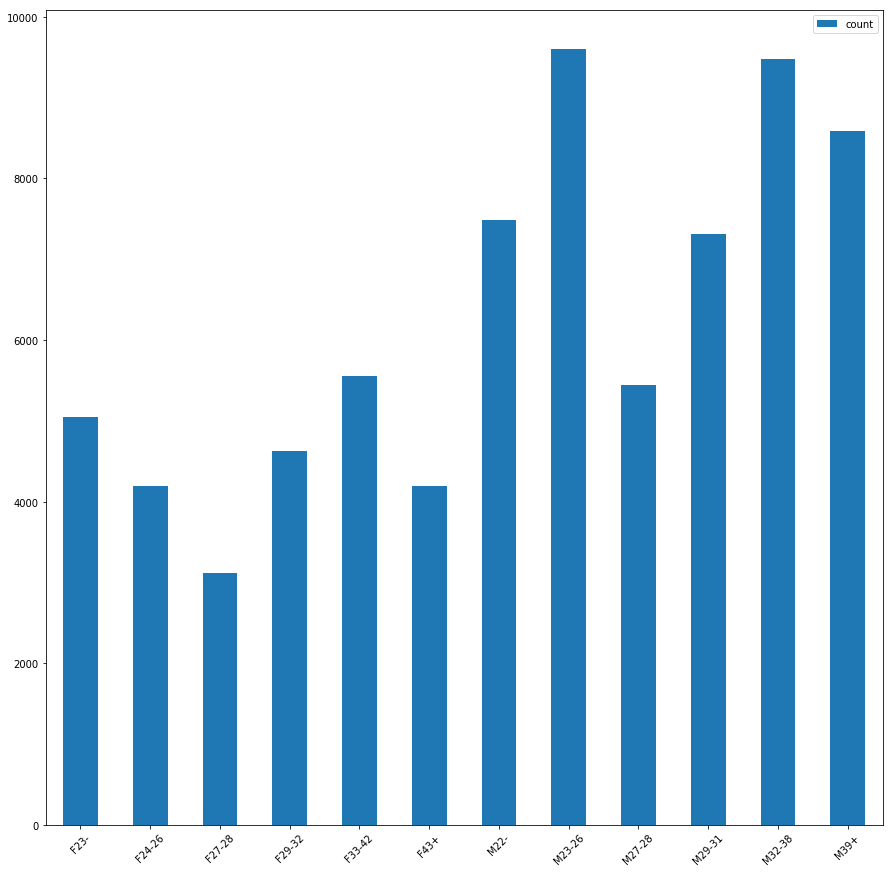

In [116]:
import numpy as np
import matplotlib.pyplot as plt

genderagegroupscount = pd.read_sql_query("SELECT distinct agegroup, COUNT(device_id) AS `count` FROM gender_age_train GROUP BY agegroup", conn)
#print genderagegroupscount

genderagegroupscount.plot(kind='bar', figsize=(15,15))
plt.xticks(genderagegroupscount.index.values, genderagegroupscount['agegroup'], rotation=45)
plt.show()

### Verteilung der User über die Smartphone-Marken

1. Bestimmen Sie die Anzahl der verschiedenen Devices und die Anzahl der verschiedenen Marken in der Tabelle *phone\_brand\_device\_model*.

2. Fügen Sie dem Pandas Dataframe mit der *gender_age_train*-Tabelle eine Spalte _brand_ hinzu und schreiben Sie in diese Spalte den Markennamen des zur jeweiligen Zeile gehörenden Device.
3. Schreiben Sie den um den Markennamen erweiterten Dataframe in ein File *gender\_age\_brand\_train.csv*.
4. Bestimmmen Sie mittels der Dataframe-Methode *value_counts()* die Anzahl der Devices pro Marke. 
5. Stellen Sie diese Verteilung der Devices über die Marken für die 20 häufigsten Marken grafisch mit einem *Matplotlib-bar-chart dar.*
6. Untersuchen Sie jetzt die Verteilung der Devices über die Marken pro Gender-Age-Group. Gibt es eine Korrelation zwischen Gender-Age-Group und Häufigkeit der Marken? Überlegen sie sich eine Visualisierung mit der eine derartige Korrelation bestätigt oder widerlegt werden kann. Implementieren Sie die Visualisierung und zeigen Sie anhand dieser Visualisierung mögliche Korrelationen zwischen Gender-Age-Group und Markenhäufigkeit. 

In [12]:
#1
print "Verschiedene Devices: ", conn.execute("SELECT count(DISTINCT device_id) FROM phone_brand_device_model;").fetchone()[0]
print "Verschiedene Marken: ", conn.execute("SELECT count(DISTINCT phone_brand) FROM phone_brand_device_model;").fetchone()[0]

Verschiedene Devices:  186716
Verschiedene Marken:  131


In [13]:
#2
print type (pd.read_sql_query("SELECT * FROM  gender_age_train;", conn))

extendedDataFrame = pd.read_sql_query("SELECT gender_age_train.*, phone_brand as brand FROM gender_age_train LEFT JOIN phone_brand_device_model on phone_brand_device_model.device_id = gender_age_train.device_id;", conn)

print extendedDataFrame.head(10)

<class 'pandas.core.frame.DataFrame'>
   index            device_id gender  age agegroup brand
0      0 -8076087639492063270      M   35   M32-38    小米
1      1 -2897161552818060146      M   35   M32-38    小米
2      2 -8260683887967679142      M   35   M32-38    小米
3      3 -4938849341048082022      M   30   M29-31    小米
4      4   245133531816851882      M   30   M29-31    小米
5      5 -1297074871525174196      F   24   F24-26  OPPO
6      6   236877999787307864      M   36   M32-38    酷派
7      7 -8098239495777311881      M   38   M32-38    小米
8      8   176515041953473526      M   33   M32-38  vivo
9      9  1596610250680140042      F   36   F33-42    三星


In [101]:
#3phone_brand_device_model
extendedDataFrame.to_csv(path_or_buf="frame.csv", encoding='utf-8')

In [15]:
#4
devicesByBrands = extendedDataFrame['brand'].value_counts()
print devicesByBrands.head(10)

小米      17336
三星      13706
华为      13001
OPPO     5802
vivo     5658
魅族       4710
酷派       3349
联想       2695
金立       1124
HTC      1015
Name: brand, dtype: int64


<class 'pandas.core.series.Series'>


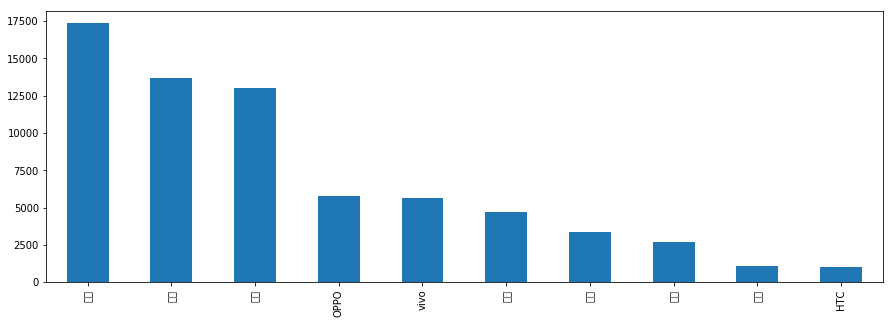

In [107]:
#5
print type(devicesByBrands)
devicesByBrands.head(10).plot(x="brand", y="dtype", figsize=(15,5), kind='bar')
plt.show()

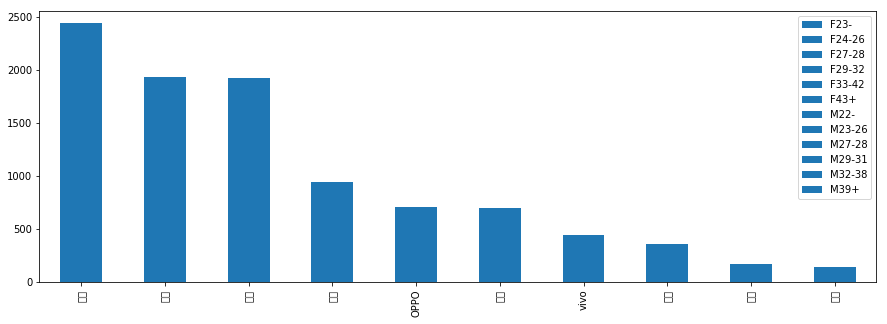

In [115]:
ageGroups = pd.read_sql_query("SELECT DISTINCT agegroup FROM gender_age_train ORDER BY agegroup;", conn)
type(ageGroups)
for group in ageGroups['agegroup']:
    type(group)
    extendedDataFrame[extendedDataFrame.agegroup == group]['brand'].value_counts().head(10).plot(x="brand", y="dtype", figsize=(15,5), label=group, kind='bar')
plt.legend()
plt.show()

## Spatio-Temporale Analyse des Verhaltens einzelner User

1. Wählen Sie aus der *events*-Tabelle ein Device, für das mindestens 30 events mit zugewiesenen Geokordinaten vorliegen.
2. Stellen Sie alle Aufenthaltsorte des zu diesem Device gehörenden Users in einer *gmaps-Heatmap* dar. Informationen hierzu finden Sie in der [gmaps-Doku]( https://github.com/pbugnion/gmaps). Für den Zugriff auf gmaps benötigen Sie einen Google-API-Key (siehe [gmaps authentication](http://jupyter-gmaps.readthedocs.io/en/latest/authentication.html))
3. Clustern Sie die 2-dimensionalen Geodaten des ausgewählten Users mit dem [DBSCAN-Algorithmus von scikit-learn](http://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html). Die Parameter des Algorithmus sind so zu wählen, dass wesentlich unterschiedliche Orte des Users in unterschiedlichen Clustern landen.
4. Stellen Sie den zeitlichen Verlauf der Events des ausgewählten Users im unten dargestellten Stil visuell dar. Auf der horizontalen Achse ist die Zeit relativ zur Zeit des ersten Events in Sekunden dargestellt. Auf der vertikalen Achse ist die Anzahl der bisherigen Events des Users aufgetragen. Mit jedem Event wird der Wert auf der vertikalen Achse um 1 erhöht. Die Farbe der Marker im Graph gibt den Aufenthaltscluster an. Für jeden in der vorigen Teilaufgabe gefundenen Aufenthaltscluster wird eine unterschiedliche Farbe benutzt (Im Beispiel unten wurden nur 2 Cluster gefunden). Diskutieren Sie das Verhalten des Users anhand des Graphs.

![Abbildung Zeitliches Auftreten der Events](https://www.hdm-stuttgart.de/~maucher/ipnotebooks/DataMining//Bilder/tempbehave.PNG "Events über der Zeit")

# Feature Extraction

Anmerkung: In den vorigen Aufgaben war das Vorgehen relativ konkret vorgegeben. In den folgenden Aufgaben sind die Vorgaben bewußt knapp gehalten. Ihre Kreativität ist gefragt.

1. Überlegen Sie sich aus welchen Merkmalen, die aus den vorhandenen Daten extrahiert werden können, möglichst gut die Gender-Age-Group vorhergesagt werden kann.
2. Extahieren Sie diese Merkmale aus den Daten für möglichst viele (mindestens 20.000) User (devices) aus der Tabelle *gender_age_train*.  

# Gender-Age-Group Prediction
1. In der vorigen Aufgabe wurde für jeden User (device) ein Merkmalsvektor berechnet. Die Menge der Merkmalsvektoren aller User aus der Tabelle *gender_age_train* bildet die Eingabe-Matrix $X$ für die Klassifikationsalgorithmen. Die Soll-Ausgabe Vektor $y$ wird durch die *gender_age_group* der User gebildet. Bringen Sie die Matrix aller Eingabevektoren in eine Form, in der
    * alle kategorialen Parameter *One-Hot*-encodiert sind [Scikit-Learn One-Hot-Encoder](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder).
    * alle Merkmale eine Varianz von 1 aufweisen. Benützen Sie hierfür die [Scikit-Learn Methode scale](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html#sklearn.preprocessing.scale).
2. Teilen Sie die Datensätze in $X$ und $y$ in eine Trainings- und eine Testpartition auf - im Verhältnis $3/4$ für Training, $1/4$ für Test. 
3. Trainieren Sie mit der Trainingspartition ein [Multilayer-Perzeptron](http://scikit-learn.org/stable/modules/neural_networks_supervised.html).
4. Testen Sie das gelernte Modell mit der Testpartition. Für die Auswertung sollte die [Accurracy](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score) und die [Confusion Matrix](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix) bestimmt werden. Finden Sie eine Parametereinstellung, die zu einer möglichst guten Accuracy führt. Interpretieren Sie die Confusion Matrix.
5. Wenden Sie nun eine [5-fache Kreuzvalidierung](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score) an und bestimmen Sie damit eine möglichst gute Parametereinstellung.
6. Mit welchen Parametern erzielen Sie die beste Accurracy? Wie hoch ist diese dann? Diskutieren Sie das Ergebnis.
